# Applied Data Science Capstone Project

## Capstone Project - Car accident severity (Week 2)

### Business Problem

To predict the severity of accidents happening on the roads of Seattle based on multiple attributes like weather, road conditions, speeding, vechile count, junction type, driving under the influence of drugs/ alcohols etc.. These attributes  will help in predicting the severity of accidents.

### Data Prepration

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.utils import resample

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_curve, auc

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

#### Load Data From CSV File

In [2]:
# https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Data_Collision = "https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv"
df = pd.read_csv(Data_Collision)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#### Data Visulaization & Analysis

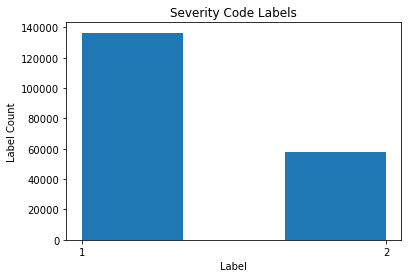

In [4]:
df['SEVERITYCODE'].plot(kind='hist',bins=3, figsize=(6, 4))
labels, counts = np.unique(df['SEVERITYCODE'], return_counts=True)
plt.title('Severity Code Labels')
plt.ylabel('Label Count') # add y-label
plt.xlabel('Label') # add x-label
plt.gca().set_xticks(labels)
plt.show()

In [5]:
print("Absolute Numbers of Labels:\n", df['SEVERITYCODE'].value_counts())
print("Normalized Numbers of Labels:\n", df['SEVERITYCODE'].value_counts(normalize=True))

Absolute Numbers of Labels:
 1    136485
2     58188
Name: SEVERITYCODE, dtype: int64
Normalized Numbers of Labels:
 1    0.701099
2    0.298901
Name: SEVERITYCODE, dtype: float64


#### Convert into Interger

In [6]:
df['WEATHER'].value_counts()
df['WEATHER'].fillna('Other', inplace=True)
df['WEATHER'].replace(to_replace=['Blowing Sand/Dirt', 'Clear', 'Fog/Smog/Smoke', 'Other', 'Overcast', 'Partly Cloudy', 'Raining', 'Severe Crosswind', 'Sleet/Hail/Freezing Rain', 'Snowing', 'Unknown'], value=[0,1,2,3,4,5,6,7,8,9,10],inplace=True)

df['ROADCOND'].value_counts()
df['ROADCOND'].fillna('Other', inplace=True)
df['ROADCOND'].replace(to_replace=['Dry', 'Ice', 'Oil', 'Other', 'Sand/Mud/Dirt', 'Snow/Slush', 'Standing Water', 'Unknown', 'Wet'], value=[0,1,2,3,4,5,6,7,8],inplace=True)

df['LIGHTCOND'].value_counts()
df['LIGHTCOND'].fillna('Other', inplace=True)
df['LIGHTCOND'].replace(to_replace=['Dark - No Street Lights', 'Dark - Street Lights Off', 'Dark - Street Lights On', 'Dark - Unknown Lighting', 'Dawn', 'Daylight', 'Dusk', 'Other', 'Unknown'], value=[0,1,2,3,4,5,6,7,8],inplace=True)

#### Verify Correlation

In [7]:
df.corr('pearson')

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,WEATHER,ROADCOND,LIGHTCOND,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
SEVERITYCODE,1.000000,0.010309,0.017737,0.020131,0.022065,0.022079,0.006553,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,-0.109427,-0.049366,-0.065991,0.004226,0.104276,0.175093
X,0.010309,1.000000,-0.160262,0.009956,0.010309,0.010300,0.120754,0.010309,0.012887,0.011304,-0.001752,-0.012168,0.010904,-0.010545,0.000168,0.009031,-0.001016,-0.001618,0.013586
Y,0.017737,-0.160262,1.000000,-0.023848,-0.027396,-0.027415,-0.114935,0.017737,-0.013850,0.010178,0.026304,0.017058,-0.019694,0.022998,0.008121,0.023914,-0.006958,0.004618,0.009508
OBJECTID,0.020131,0.009956,-0.023848,1.000000,0.946383,0.945837,0.046929,0.020131,-0.062333,0.024604,0.034432,-0.094280,-0.037094,-0.021670,0.002021,0.034330,0.969276,0.028076,0.056046
INCKEY,0.022065,0.010309,-0.027396,0.946383,1.000000,0.999996,0.048524,0.022065,-0.061500,0.024918,0.031342,-0.107528,-0.027617,-0.036277,-0.006372,0.032616,0.990571,0.019701,0.048179
COLDETKEY,0.022079,0.010300,-0.027415,0.945837,0.999996,1.000000,0.048499,0.022079,-0.061403,0.024914,0.031296,-0.107598,-0.027461,-0.036437,-0.006468,0.032541,0.990571,0.019586,0.048063
INTKEY,0.006553,0.120754,-0.114935,0.046929,0.048524,0.048499,1.000000,0.006553,0.001886,-0.004784,0.000531,-0.012929,0.007114,-0.001983,0.001187,0.005225,0.032604,-0.010510,0.018420
SEVERITYCODE.1,1.000000,0.010309,0.017737,0.020131,0.022065,0.022079,0.006553,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,-0.109427,-0.049366,-0.065991,0.004226,0.104276,0.175093
PERSONCOUNT,0.130949,0.012887,-0.013850,-0.062333,-0.061500,-0.061403,0.001886,0.130949,1.000000,-0.023464,-0.038809,0.380523,-0.128960,-0.063811,-0.032800,-0.053901,0.011784,-0.021383,-0.032258
PEDCOUNT,0.246338,0.011304,0.010178,0.024604,0.024918,0.024914,-0.004784,0.246338,-0.023464,1.000000,-0.016920,-0.261285,0.260393,-0.013058,0.004056,-0.046571,0.021461,0.001810,0.565326


#### Data Balancing

In [8]:
df_1=df[df.SEVERITYCODE==1]
df_2=df[df.SEVERITYCODE==2]
df_1=resample(df_1,replace=False,n_samples=58188,random_state=123)
df_Bal=pd.concat([df_1,df_2])
df_Bal['SEVERITYCODE'].value_counts()
print("Absolute Numbers of Labels: \n", df_Bal['SEVERITYCODE'].value_counts())
print("Normalized Numbers of Labels: \n", df_Bal['SEVERITYCODE'].value_counts(normalize=True))

Absolute Numbers of Labels: 
 2    58188
1    58188
Name: SEVERITYCODE, dtype: int64
Normalized Numbers of Labels: 
 2    0.5
1    0.5
Name: SEVERITYCODE, dtype: float64


#### Feature Set

In [9]:
X=df_Bal[['WEATHER','ROADCOND','LIGHTCOND', 'VEHCOUNT']].values
y=df_Bal['SEVERITYCODE']

#### Normalize Data

In [10]:
X= preprocessing.StandardScaler().fit(X).transform(X)

#### Train Test Split

In [11]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=4)
print ('Training set:', X_train.shape, y_train.shape) 
print ('Testing set:', X_test.shape, y_test.shape)

Training set: (87282, 4) (87282,)
Testing set: (29094, 4) (29094,)


###  Classification/ Modeling/ Evaluation

#### K-Nearest Neighbors (KNN)

K with Highest Accuracy = 14


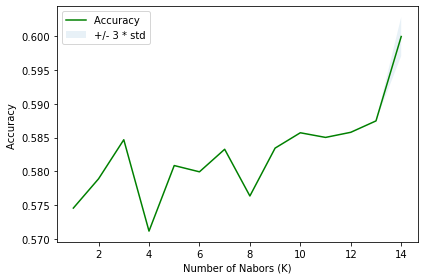

In [12]:
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    
std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc
print ("K with Highest Accuracy =", mean_acc.argmax()+1)

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3 * std'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [13]:
neigh = KNeighborsClassifier(n_neighbors = (mean_acc.argmax()+1)).fit(X_train,y_train)
yhat=neigh.predict(X_test)

##### Confusion Matrix

Confusion Matrix, without normalization
[[10258  4262]
 [ 7377  7197]]


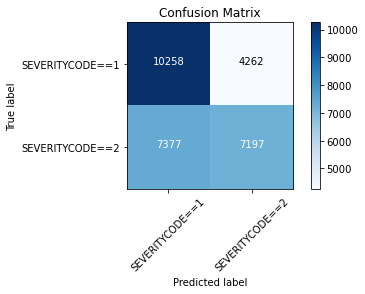

In [14]:
plot_confusion_matrix(confusion_matrix(y_test, yhat, labels=[1,2]), classes=['SEVERITYCODE==1','SEVERITYCODE==2'],normalize= False,  title='Confusion Matrix')

In [17]:
KNN_f1=f1_score(y_test, yhat, average='weighted')

from sklearn.metrics import jaccard_score as jaccard_score
KNN_jac=jaccard_score(y_test, yhat)

print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
print( "KNN accuracy", mean_acc.max())
print("The F1-score is",KNN_f1 )
print("The Jaccard similarity score is",KNN_jac)

Train set Accuracy:  0.5995050525881626
Test set Accuracy:  0.599951880112738
KNN accuracy 0.599951880112738
The F1-score is 0.5953950705187826
The Jaccard similarity score is 0.4684659999086633


#### Decision Tree 

In [18]:
max_depth = 10
mean_acc = np.zeros((max_depth-1))
std_acc = np.zeros((max_depth-1))
for n in range(1,max_depth):
    dec = DecisionTreeClassifier(criterion='entropy', max_depth=n).fit(X_train,y_train)
    yhat = dec.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc
print ("Max Depth=", mean_acc.argmax()+1)

Max Depth= 5


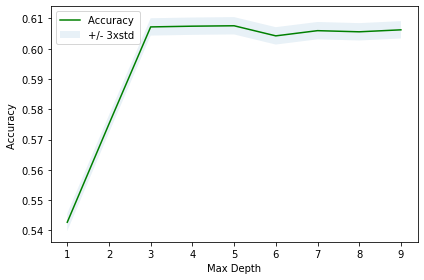

In [19]:
plt.plot(range(1,max_depth),mean_acc,'g')
plt.fill_between(range(1,max_depth),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Max Depth')
plt.tight_layout()
plt.show()

In [20]:
DTree = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
DTree.fit(X_train,y_train)
predDTree = DTree.predict(X_test)

##### Confusion Matrix

Confusion Matrix, without normalization
[[12370  2150]
 [ 9267  5307]]


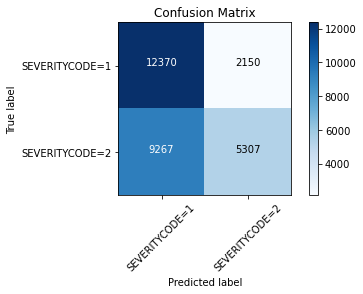

In [21]:
plot_confusion_matrix(confusion_matrix(y_test, predDTree, labels=[1,2]), classes=['SEVERITYCODE=1','SEVERITYCODE=2'],normalize= False,  title='Confusion Matrix')

In [20]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, DTree.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, predDTree))
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predDTree))
DTree_f1= f1_score(y_test, predDTree, average='weighted')
print("The F1-score is", DTree_f1 )
DTree_jac=jaccard_score(y_test, predDTree)
print("The Jaccard similarity score is",DTree_jac)

Train set Accuracy:  0.6059439517884558
Test set Accuracy:  0.607582319378566
DecisionTrees's Accuracy:  0.607582319378566
The F1-score is 0.5828190410528927
The Jaccard similarity score is 0.5200319502249128


#### Logistic Regression

In [22]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat3 = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

In [23]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, LR.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat3))
from sklearn.metrics import f1_score
print("LR Accuracy: ", metrics.accuracy_score(y_test, yhat3))
LR_f1=f1_score(y_test, yhat3, average='weighted')
print("The F1-score is", LR_f1)
LR_jac=jaccard_score(y_test, yhat3)
print("The Jaccard similarity score is",LR_jac)
from sklearn.metrics import log_loss
LR_ll=log_loss(y_test, yhat_prob)
print("The logLoss is:",LR_ll)

Train set Accuracy:  0.5257785110332027
Test set Accuracy:  0.5233037739740153
LR Accuracy:  0.5233037739740153
The F1-score is 0.5139481843676582
The Jaccard similarity score is 0.2869408740359897
The logLoss is: 0.6811191407676671


Confusion Matrix, without normalization
[[5581 8939]
 [4930 9644]]


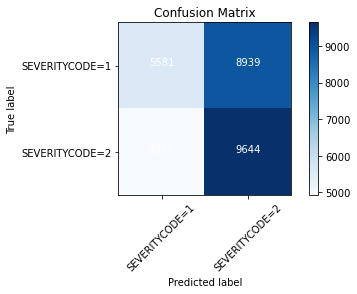

In [24]:
plot_confusion_matrix(confusion_matrix(y_test, yhat3, labels=[1,2]), classes=['SEVERITYCODE=1','SEVERITYCODE=2'],normalize= False,  title='Confusion Matrix')

### Result

After, studing & comparing the metrics of different models, the best model is which give the highest F1 score, the highest Jaccard score and the smallest log loss.

With respect to that, the Decsion Tree will be the best model to selesct in this paticular case.

### Conclusion

This decision tree can now be used to predict the severity of the car accidents that will happen in Seattle based on the known conditions like weather, lighting conditions, road condition and vehiclecount. 

The model generated in this project can be used by state departments, drivers, cab companies to predict the severity of the accidents that might happen given the conditions at hand and hence will allow them to be well prepared to handle such situations more effectively.